In [31]:
def clasificationPerformance(ground_truth, computed_values):
    """
    Returneaza TN (True Negative), FP(False Positive), FN(False Negative), TP(True Positive)
    """
    TN = 0
    FP = 0
    FN = 0
    TP = 0
    
    for i in range(0, len(ground_truth)):
        #consideram malign = positive, benign = negative 
        if ground_truth[i] == "M":
            if computed_values[i] == "M":
                TP += 1
            else:
                FP += 1
        else:
            if computed_values[i] == "B":
                TN += 1
            else:
                FN += 1
    return TN, FP, FN, TP


def getAccuracy(TN, FP, FN, TP):
    """ 
    accuracy represents the overall performance of classification model:
    (TP+TN)/(TN+FP+FN+TP)
    """
    return (TP+TN)/(TN+FP+FN+TP)

def getPrecision(FP, TP):
    """
    precision indicates how accurate the positive predictions are 
    TP/(TP+FP)
    """
    return TP/(TP+FP)

def getRecall(TP, FN):
    """ 
    recall indicates the coverage of actual positive sample
    TP/(TP+FN)
    """
    return TP/(TP+FN)


In [32]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import linear_model
import pandas as pd 
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from scipy.special import expit
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
def readData():
    X = breast_cancer_wisconsin_diagnostic.data.features 
    y = breast_cancer_wisconsin_diagnostic.data.targets 
    data = {
        "radius": preprocessing.normalize([X["radius1"]])[0],
        "texture": preprocessing.normalize([X["texture1"]])[0],
        "diagnosis": y["Diagnosis"]
    }
    dataFrame = pd.DataFrame(data)
    return dataFrame

def plotDataDistribution(dataFrame):
    fig, axes = plt.subplots(nrows=3, figsize=(15,15))
    axes[0].hist(dataFrame["radius"])
    axes[0].set_title("Radius")
    axes[1].hist(dataFrame["texture"])
    axes[1].set_title("Texture")
    axes[2].hist(dataFrame["diagnosis"])
    axes[2].set_title("Diagnosis")
    plt.show()

def plotData(dataFrame):
    ind_malign = [i for i in range(0, dataFrame.shape[0]) if dataFrame["diagnosis"].iloc[i] == 'M'] 
    ind_benign = [i for i in range(0, dataFrame.shape[0]) if dataFrame["diagnosis"].iloc[i] == 'B']
    radius_malign = [dataFrame["radius"].iloc[i] for i in ind_malign]
    radius_benign = [dataFrame["radius"].iloc[i] for i in ind_benign]

    texture_malign = [dataFrame["texture"].iloc[i] for i in ind_malign]
    texture_benign = [dataFrame["texture"].iloc[i] for i in ind_benign]

    fig, axes = plt.subplots()
    axes.plot(radius_malign, texture_malign, 'ro')
    axes.plot(radius_benign, texture_benign, 'go')
    
    axes.set_xlabel('Radius')
    axes.set_ylabel('Texture')
    axes.set_title('Relation between Radius and Texture')

    plt.show()

def getTrainingAndValidationSets(dataFrame):
    dataSize = dataFrame.shape[0]
    
    trainingIndexSet = np.random.choice(range(dataSize), size=int(0.8 * dataSize), replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet]

    trainingInputSet = [[dataFrame["radius"].iloc[index], dataFrame["texture"].iloc[index]] for index in trainingIndexSet]
    trainingOutputSet = [dataFrame["diagnosis"].iloc[index] for index in trainingIndexSet]

    validationInputSet = [[dataFrame["radius"].iloc[index], dataFrame["texture"].iloc[index]] for index in validationIndexSet]
    validationOutputSet = [dataFrame["diagnosis"].iloc[index] for index in validationIndexSet]

    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet


def plotTrainingAndValidationSets(dataFrame):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSets(dataFrame)
    ind_malign_test = [i for i in range(0, len(trainingInputSet)) if trainingOutputSet[i] == 'M'] 
    ind_benign_test = [i for i in range(0, len(trainingInputSet)) if trainingOutputSet[i] == 'B']

    ind_malign_antrenament = [i for i in range(0, len(validationInputSet)) if validationOutputSet[i] == 'M'] 
    ind_benign_antrenament = [i for i in range(0, len(validationInputSet)) if validationOutputSet[i] == 'B'] 

    radius_malign_test = [trainingInputSet[i][0] for i in ind_malign_test]
    radius_benign_test = [trainingInputSet[i][0] for i in ind_benign_test]

    radius_malign_antrenament = [validationInputSet[i][0] for i in ind_malign_antrenament]
    radius_benign_antrenament = [validationInputSet[i][0] for i in ind_benign_antrenament]

    texture_malign_test = [trainingInputSet[i][1] for i in ind_malign_test]
    texture_benign_test = [trainingInputSet[i][1] for i in ind_benign_test]

    texture_malign_antrenament = [validationInputSet[i][1] for i in ind_malign_antrenament]
    texture_benign_antrenament = [validationInputSet[i][1] for i in ind_benign_antrenament]

    fig, axes = plt.subplots()
    axes.plot(radius_malign_test, texture_malign_test, 'ro')
    axes.plot(radius_benign_test, texture_benign_test, 'go')
    axes.plot(radius_malign_antrenament, texture_malign_antrenament, 'r^')
    axes.plot(radius_benign_antrenament, texture_benign_antrenament, 'g^')
    
    axes.set_xlabel('Radius')
    axes.set_ylabel('Texture')
    axes.set_title('Relation between Radius and Texture')

    plt.show()
    

def getRegressorFromLibrary(dataFrame):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(dataFrame)
    X = [el for el in trainingInputSet]
    regressor = linear_model.SGDClassifier();
    regressor.fit(X, trainingOutputSet)
    return regressor

def getErrors(dataFrame):
    _,_, validationInputSet, validationOutputSet = getTrainingAndValidationSets(dataFrame)
    regressor = getRegressorFromLibrary(dataFrame)
    computedValidationOutputs = regressor.predict(validationInputSet)

    TN, FP, FN, TP = clasificationPerformance(validationOutputSet, computedValidationOutputs)
    accuracy = getAccuracy(TN, FP, FN, TP)
    precision = getPrecision(FP, TP)
    recall = getRecall(TP, FN)
    return accuracy, precision, recall


# PROBLEMA 2 - Clasificarea țesuturilor cancerigene

## Distributia datelor

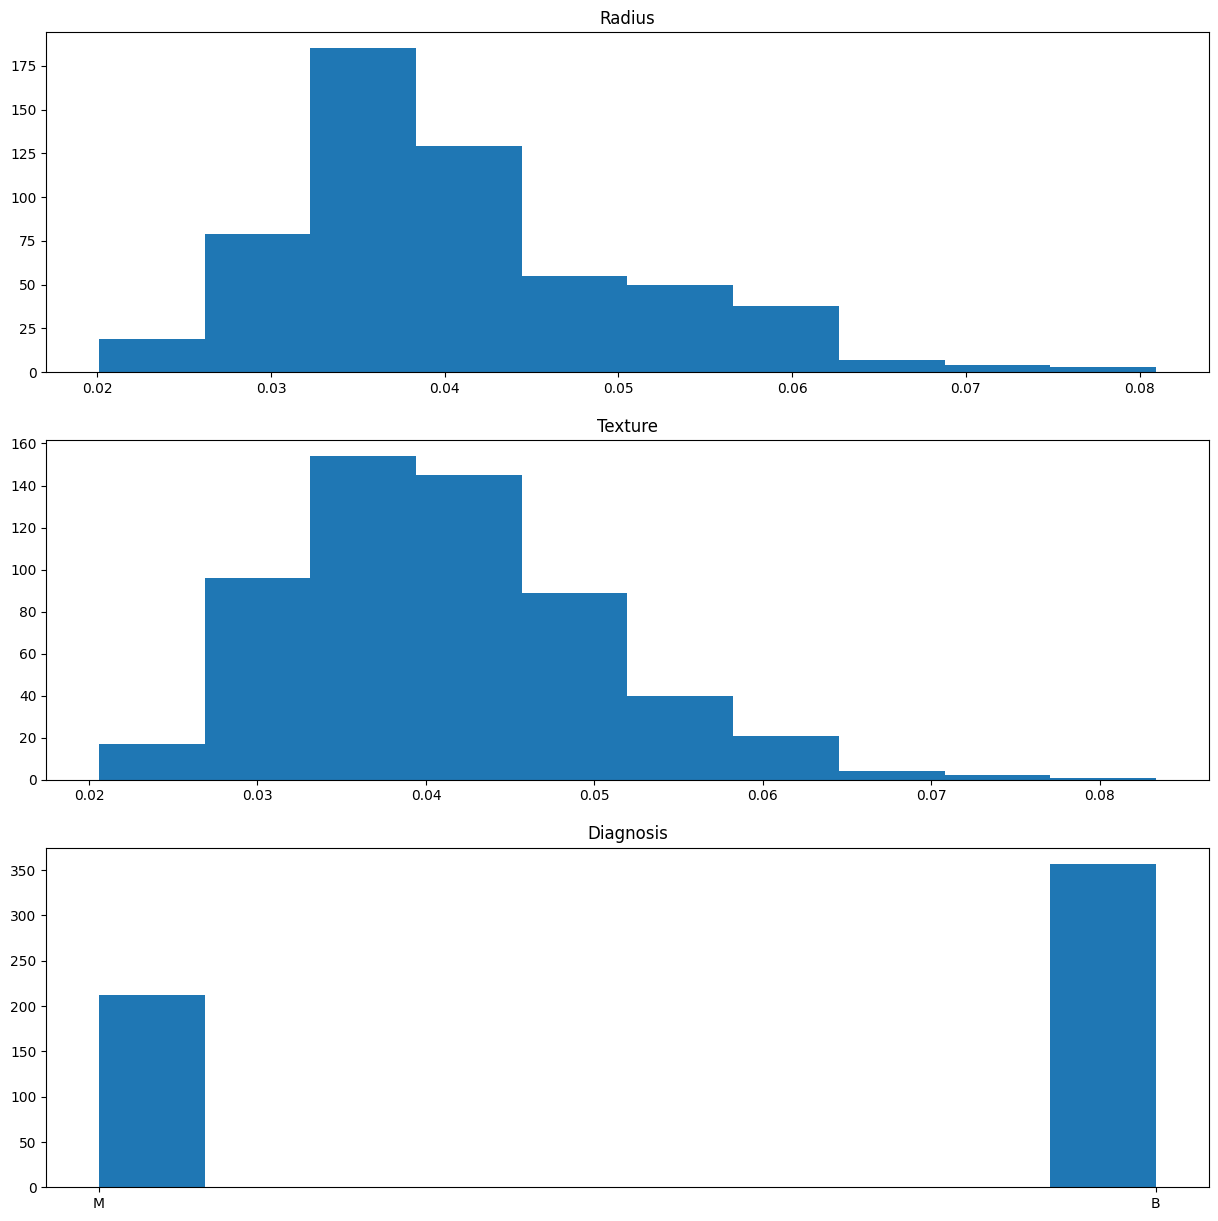

In [33]:
dataFrame = readData()
plotDataDistribution(dataFrame)

## Plot data

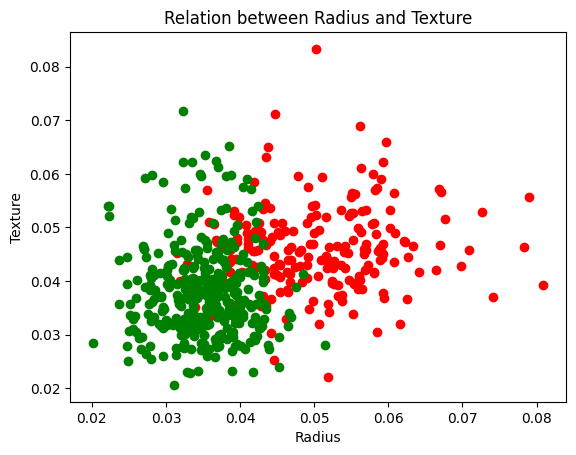

In [34]:
plotData(dataFrame)

## Impartirea datelor in date de antrenament si date de test

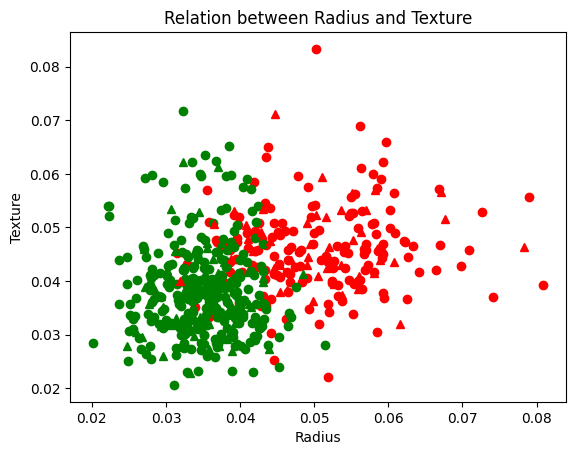

In [35]:
plotTrainingAndValidationSets(dataFrame)

## Formula regresor + erori

In [36]:
regressor = getRegressorFromLibrary(dataFrame)
w0, w1, w2 = regressor.intercept_[0], regressor.coef_[0][0], regressor.coef_[0][1]
print("LEARNED MODEL: f(x) = ", w0, " + ", w1, " * x1", " + ", w2, " * x2")

accuracy, precision, recall = getErrors(dataFrame)
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)

LEARNED MODEL: f(x) =  -3.4266800819063583  +  43.139268790079285  * x1  +  20.63871400548934  * x2
Accuracy =  0.6754385964912281
Precision =  0.02631578947368421
Recall =  1.0


# Regresor propiu 

In [54]:
class MyRegressor:
    def __init__(self) -> None:
        self.coeficienti = []
    
    def computeValue(self, line):
        number = 0
        for i in range(0, len(line)):
            number += line[i] * self.coeficienti[i]
        return expit(number)
    
    def train(self, input, output, learning_rate=0.01, epochs=1000):
        newInput = [[1] + line for line in input]
        
        for feature in range(0, len(newInput[-1])):
            self.coeficienti.append(0.0)

        for epoch in range(0, epochs):
            error = [0 for i in range(0, len(newInput[-1]))]
            for i in range(0, len(newInput)):
                computedValue = self.computeValue(newInput[i])
                if output[i] == "M":
                    err = 1 - computedValue
                else:
                    err = 0 - computedValue

                for j in range(0, len(newInput[-1])):
                    error[j] += err * newInput[i][j]
            
            for coef_index in range(0,len(self.coeficienti)):
                self.coeficienti[coef_index] = self.coeficienti[coef_index] - learning_rate * error[coef_index]/len(newInput)         

    def predict(self, input):
        output = []
        for line in input:
            value = self.computeValue([1] + line)
            label = None
            if value > 0.5:
                label = "M"
            else:
                label = "B"                
            output.append(label)
        return output
    

def getMyRegressor(dataFrame):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(dataFrame)
    X = [el for el in trainingInputSet]
    regressor = MyRegressor()
    regressor.train(X, trainingOutputSet)
    return regressor

def getErrors2(dataFrame):
    _,_, validationInputSet, validationOutputSet = getTrainingAndValidationSets(dataFrame)
    regressor = getMyRegressor(dataFrame)
    computedValidationOutputs = regressor.predict(validationInputSet)

    TN, FP, FN, TP = clasificationPerformance(validationOutputSet, computedValidationOutputs)
    accuracy = getAccuracy(TN, FP, FN, TP)
    precision = getPrecision(FP, TP)
    recall = getRecall(TP, FN)
    return accuracy, precision, recall

def predictCancerUsingMyRegressor(dataFrame, input):
    regressor = getMyRegressor(dataFrame)
    output = regressor.predict(input)
    return output

def predictCancerUsingLibraryRegressor(dataFrame, input):
    regressor = getRegressorFromLibrary(dataFrame)
    output = regressor.predict(input)
    return output


## Formula regresor + erori

In [55]:
regressor2 = getMyRegressor(dataFrame)
w0, w1, w2 = regressor2.coeficienti[0], regressor2.coeficienti[1], regressor2.coeficienti[2]
print("LEARNED MODEL: f(x) = ", w0, " + ", w1, " * x1", " + ", w2, " * x2")

accuracy2, precision2, recall2 = getErrors2(dataFrame)
print("Accuracy = ", accuracy2)
print("Precision = ", precision2)
print("Recall = ", recall2)

LEARNED MODEL: f(x) =  3.600965526183269  +  0.11077581913598061  * x1  +  0.1296129207960885  * x2
Accuracy =  0.32456140350877194
Precision =  1.0
Recall =  0.32456140350877194


## Predictia cancerului unei leziuni caracterizata printr-o textura de valoare 10 si o raza de valoare 18 

In [56]:
input = [[18, 10]]
myOutput = predictCancerUsingMyRegressor(dataFrame,input)
libraryOutput = predictCancerUsingLibraryRegressor(dataFrame, input)
print("What my regressor predicted: ", myOutput)
print("What the library regressor predicted: ", libraryOutput)

What my regressor predicted:  ['M']
What the library regressor predicted:  ['M']
